### 1. Бинарное дерево.

***Дерево*** - это ***связный ациклический*** граф.  
***Дерево*** - это ***связный*** граф, состоящий из **$n$** вершин и $n - 1$ ребра.  
***Корневое*** или ***подвешенное*** дерево - дерево с одной выделенной вершиной 𝑟𝑜𝑜𝑡  - корнь дерева  (практически всегда  𝑟𝑜𝑜𝑡=$1$ ).

***Бинарное дерево*** - корневое дерево, каждая вершина которого имеет не более двух дочерних, чаще всего чётко упорядоченных: левую и правую. 

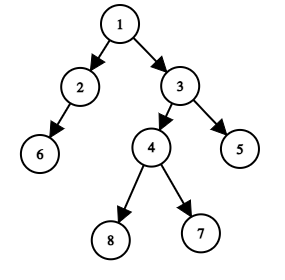

***Полное бинарное дерево*** - дерево, все вершины которого имеют по две дочерних, кроме листьев, которые расположены на одинаковой глубине.  
Дочерний уровень заполняется слева направо.

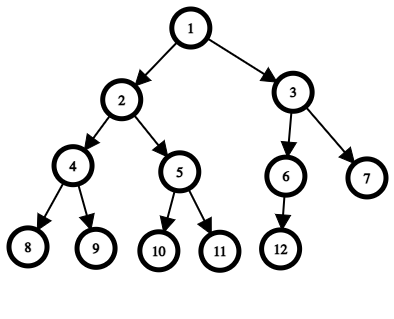

При $1$-индексации вершин по уровням, приведённой выше, существуют простые формулы перехода между вершинами. Для вершины с индексом $v$ формулы для спуска влево, спуска вправо, и подъёма вверх выглядят следующим образом:  
  
  $l = 2 \cdot v$  
  $r = 2 \cdot v+1$  
  $p = \left \lfloor \frac{v}{2} \right \rfloor$

При  $0$ -индексации вершин формулы перехода между вершинами принимают вид:

$l = 2 \cdot (v + 1) - 1$  
$r = 2 \cdot (v + 1)$  
$p = \left \lfloor \frac{v - 1}{2} \right \rfloor$

В связи с этим полные бинарные деревья чаще всего хранят в виде простого массива $tree$, где $tree[v]$ - некоторое значение, присвоенное вершине с индексом $v$. Для обхода дерева используются формулы, приведённые выше.  

Стоит отметить, что высота (количество уровней) полного бинарного дерева из $N$ вершин равна $log(N)$. Это свойство часто используется для оценки сложности различных алгоритмов.

### 2. Структура данных.

Структура данных — это контейнер, который хранит данные в определенном макете. Этот «макет» позволяет структуре данных быть эффективной в некоторых операциях и неэффективной в других.

### 3. Куча.

***Куча*** (англ. heap) - одна из простейших структур данных, основанных на деревьях.  
Куча используется для поддерживания некоторого множества элементов с возможностью быстрого нахождения максимума или минимума.  
Соответственно выделяют ***min_heap*** и ***max_heap***.

Структура данных **двоичная куча** должна уметь эффективно поддерживать следующие операции:  
  
+ добавить элемент в кучу(сложность $O(logN)$)  
+ найти максимум (сложность $O(1)$)  
+ извлечь максимальный элемент (сложность $O(logN)$)

Элементы в куче хранятся в виде полного бинарного дерева.  
Главное свойство, которое делает бинарное дерево кучей, ***инвариант кучи***, формулируется следующим образом:  
  
  - ***Элемент в каждой вершине больше элементов во всех дочерних вершинах, либо равен элементам в своих дочерних вершинах***  
    
Из этого свойства следует, что максимальный (минимальный) элемент всегда будет находиться в корне дерева.

Построим одну из возможных max_heap для списка элементов $a = [36, 3, 7, 100, 25, 19, 1, 17, 2]$

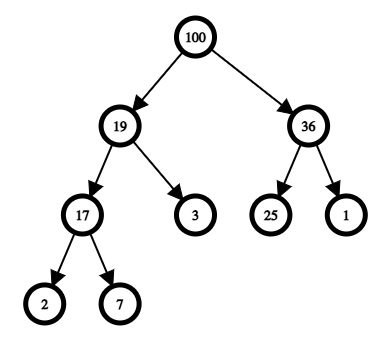

### 4. Построение кучи.

Имеем список элементов  
$a = [36, 3, 7, 100, 25, 19, 1, 17, 2]$  

In [1]:
𝑎 = [36,3,7,100,25,19,1,17,2]

Построим из этого списка ***max_heap***.  
***max_heap*** так же будет списком с особенным расположением элементов.  
Изначально ***max_heap*** пуст.

In [2]:
max_heap = []

***4.1 Добавление нового элемента в кучу с сохранением инварианта кучи***.

Научимся добавлять новый элемент в кучу с сохранением инварианта кучи.

In [3]:
def insert(arr, x):
    arr.append(x)

При добавлении в кучу нового элемента, ему присваивается первый доступный индекс. То есть, бинарное дерево заполняется по уровням слева направо. 

После добавления элемента возможно, что инвариант кучи перестанет выполняться, так как новый элемент будет больше своего прямого предка. В таких случаях просто меняем элемент местами с прямым предком. Если инвариант кучи всё ещё не выполняется, меняем его местами с новым предком, и так далее, пока куча не нормализуется. Такая операция называется ***проталкиванием вверх***.

In [4]:
def insert(arr, x):
    arr.append(x)
    sift_up(arr, len(arr) - 1)

In [5]:
def sift_up(arr, i):
    while i != 0 and arr[i] > arr[(i - 1) // 2]:
        arr[i], arr[(i - 1) // 2] = arr[(i - 1) // 2], arr[i]
        i = (i - 1) // 2

In [6]:
for i in a:
    insert(max_heap, i)

print(max_heap)

[100, 36, 19, 17, 25, 7, 1, 3, 2]


***4.2 Извлечение максимального элемента из кучи с сохранением инварианта кучи***.

Научимся извлекать максимальный элемент из кучи с сохранением инварианта кучи. Под извлечением максимального элемента кучи будем подразумевать удаление этого элемента из кучи, возможно с предварительным выводом его на печать или сохранением в другой структуре.

Максимальный элемент в max_heap равен $max\_heap[0]$. Удаление нулевого элемента из списка - дорогая опереация, $O(N).$  
Как выполнить её быстрее?

$1$. Меняем местами нулевой элемент с последним - $O(1)$.  
$2$. Делаем ***pop()*** - $O(1)$.  

In [8]:
def extract_max(arr):
    ans = arr[0]
    arr[0], arr[-1] = arr[-1], arr[0]
    arr.pop()
    print(ans)

При перемещении последнего элемента в куче (крайний правый на последнем уровне) в корень дерева на место удалённого максимума, мы почти наверняка нарушим инвариант кучи, так как новый "максимум" будет меньше элементов в дочерних вершинах.  
Для восстановления инварианта, сравним два дочерних элемента, выберем из них больший, и поменяем его местами с текущим "максимумом". Повторяем эту операцию, пока инвариант не восстановится. Это называется ***проталкиванием вниз***.



$3$. Восстановление инварианта кучи - $O(log(N))$.

In [9]:
def sift_down(arr, i):
    while True:
        j = i
        if 2 * i + 1 < len(arr) and arr[2 * i + 1] > arr[i]:
            j = 2 * i + 1
        if 2 * i + 2 < len(arr) and arr[2 * i + 2] > arr[j]:
            j = 2 * i + 2
        if i != j:
            arr[i], arr[j] = arr[j], arr[i]
            i = j
        else:
            break

Перепишем функцию $extract\_max$:

In [10]:
def extract_max(arr):
    ans = arr[0]
    arr[0], arr[-1] = arr[-1], arr[0]
    arr.pop()
    sift_down(arr, 0)
    print(ans)